## Problem 9.1
Calculate the spectrum of eigenvalues for Dirac particles in a square well potential of depth $V_0 \leq 0$ and width a 

for this notebook, we have taken as a convention:

- E rest/2
- V0 = -10
- a = 5
- zi = -10
- zf = 10
- step = 0.1
- s = 42
- m0 = 938

In [1]:
using Roots, Plots, Random
pyplot()

Plots.PyPlotBackend()

firstly we can split the domain into 3 parts

In [2]:
include("../../Constants/src/Short.jl")

0.0189

We can take keyword arguments throughout the calculation, for now they can be:

[zi, step, zf, a]

In [67]:
m0 = 938
rest = m0*c^2
kw = Dict(:zi => -50, :step => 0.1, :zf => 50)
z = [i for i in kw[:zi]:kw[:step]:kw[:zf]];

In [68]:
E, V0, a, κ, s = "", -100, 20, "", 42

("", -100, 20, "", 42)

In [69]:
function domain(I=1; zi=-10, step=0.1, zf=-zi, a=5)
    if I == 1
        return [i for i in zi:step:-a/2-step]
    elseif I == 2
        return [i for i in -a/2:step:a/2]
    elseif I == 3
        return [i for i in a/2+step:step:zf]
    end
end

domain (generic function with 2 methods)

In [70]:
function potential(V0=V0; a=a, kwargs...)

    Z = Float64[]
    
    for i in 1:3
        l = length(domain(i; a=a, kwargs...))
        if i == 1 || i == 3
            for j in 1:l
                push!(Z, 0)
            end
        elseif i == 2
            for j in 1:l
                push!(Z, V0)
            end
        end
    end
    
    return Z
end

potential (generic function with 2 methods)

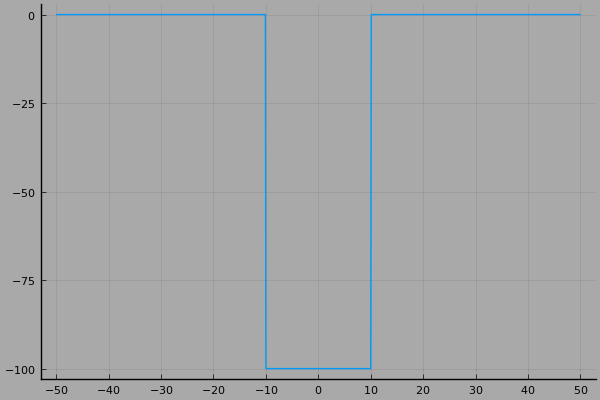

In [71]:
plot(z, potential(V0; a=a, kw...), background_color="darkgrey", legend=false, xticks=(kw[:zi]:100*kw[:step]:kw[:zf]))

We can construct a Dirac wavefunction, for both relativistic and non-relativistic;

we construct a momentum in all 3 spatial dirtections via a random number generator, and then re-organise that momentum into the Dirac projection operators, relevant for the wavefunction.

We then further construct 4 vectors describing in order:
- spin up particle
- spin down particle
- spin down antiparticle
- spin up antiparticle

these come in relativistic and non-relativistic form:

In [72]:
function ψ(z=1; E="", m0=m0, state="", rel="y", s=s, dir="f")
    
    β = maximum(z)/2
    l = length(z)
    p = []
    
    if E == ""
        E = (m0*c^2)/8
    end

    for i in 1:l
        if dir == "b"
            k = vcat(exp(-(z[i]/β)^2)*rand(Random.seed!(s),2), -v(m0,E))
            push!(p, [k[1]+im*k[2], k[1]-im*k[2], k[3]])
        else
            k = vcat(exp(-(z[i]/β)^2)*rand(Random.seed!(s),2), v(m0,E))
            push!(p, [k[1]+im*k[2], k[1]-im*k[2], k[3]])
        end
    end
    
    Ω = Array[]
    for i in 1:l
        ω = ComplexF64[]
        push!(ω, 1)
        push!(ω, 0)
        if rel == "n"
            [push!(ω, 0) for i in 1:2]
        else
            push!(ω, (p[i][3]*c)/(E+m0*c^2))
            push!(ω, (p[i][1]*c)/(E+m0*c^2))
        end

        push!(ω, 0)
        push!(ω, 1)
        if rel == "n"
            [push!(ω, 0) for i in 1:2]
        else
            push!(ω, (p[i][2]*c)/(E+m0*c^2))
            push!(ω, (-p[i][3]*c)/(E+m0*c^2))
        end

        if rel == "n"
            [push!(ω, 0) for i in 1:2]
        else
            push!(ω, (p[i][3]*c)/(E+m0*c^2))
            push!(ω, (p[i][1]*c)/(E+m0*c^2))
        end
        push!(ω, 1)
        push!(ω, 0)

        if rel == "n"
            [push!(ω, 0) for i in 1:2]
        else
            push!(ω, (p[i][2]*c)/(E+m0*c^2))
            push!(ω, (-p[i][3]*c)/(E+m0*c^2))
        end
        push!(ω, 0)
        push!(ω, 1)
        ω = reshape(ω, 4, 4)
        push!(Ω, ω)
    end
    
    if state == "sup" 
        return [sqrt((E+m0*c^2)/(2m0*c^2))*Ω[i][:,1]*exp(im*p[i][3]*z[i]/ħ) for i in 1:l]
    elseif state == "sdp"
        return [sqrt((E+m0*c^2)/(2m0*c^2))*Ω[i][:,2]*exp(im*p[i][3]*z[i]/ħ) for i in 1:l]
    elseif state == "sdap"
        return [sqrt((E+m0*c^2)/(2m0*c^2))*Ω[i][:,3]*exp(im*p[i][3]*z[i]/ħ) for i in 1:l]
    elseif state == "suap"
        return [sqrt((E+m0*c^2)/(2m0*c^2))*Ω[i][:,4]*exp(im*p[i][3]*z[i]/ħ) for i in 1:l]
    else 
        return [sqrt((E+m0*c^2)/(2m0*c^2))*Ω[i]*exp(im*p[i][3]*z[i]/ħ) for i in 1:l]
    end
end

ψ (generic function with 2 methods)

In [73]:
@time ψ(z; state="sup");

  0.427434 seconds (1.21 M allocations: 61.576 MiB, 6.89% gc time)


  0.052110 seconds (184.35 k allocations: 7.329 MiB)


┌ Warning: Attribute alias `zlabel` detected in the user recipe defined for the signature (::Array{Float64,1}, ::Array{Complex{Float64},1}). To ensure expected behavior it is recommended to use the default attribute `zguide`.
└ @ Plots /Users/joe/.julia/packages/Plots/u8HRI/src/pipeline.jl:15
┌ Warning: Attribute alias `ylabel` detected in the user recipe defined for the signature (::Array{Float64,1}, ::Array{Complex{Float64},1}). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots /Users/joe/.julia/packages/Plots/u8HRI/src/pipeline.jl:15


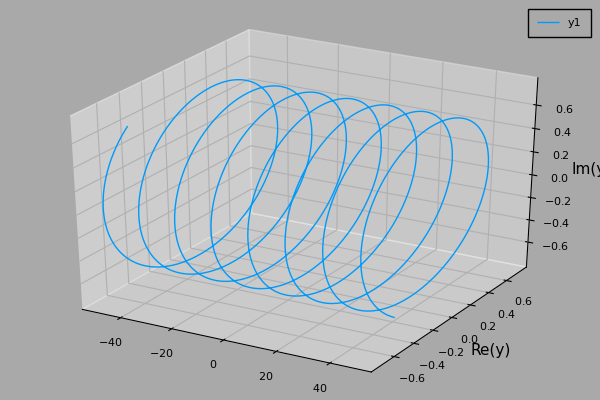

In [74]:
@time let 
    δ = ψ(z; state="sup")
    p = plot(z, [δ[i][1] for i in 1:length(z)], background_color="darkgrey")
    p
end

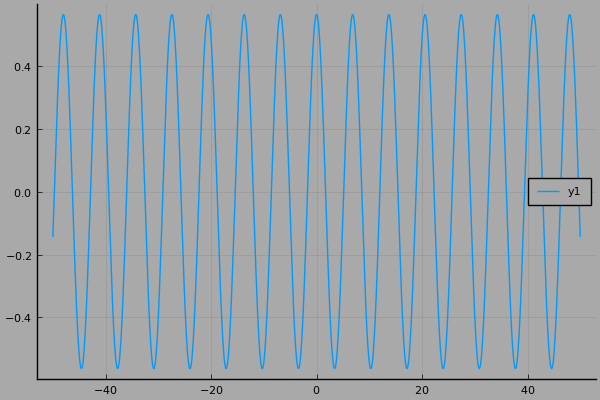

In [75]:
let 
    δ = ψ(z; state="sdp")
    ψψ = [real(sum((δ[i]) .* δ[i])) for i in 1:length(z)]
    plot(z, ψψ, background_color="darkgrey")
end

With the free wavefunction in hand, we can start applying it and manipulating it to obtain a wavefunction traversing a potential.

Firstly we can deal with an interaction that does not affect spin/ isospin ... etc, just a potential that affects the energy

In fact for now we are just dealing with a square well potential

When constructing the wavefunction, we have 6 normalization constants which we must solve for, with a little math manipulation which can be found "../../../docs/", we can make a useful definition, and solve for the constants with two matrix equations and a normalization condition 

In [76]:
γ(E, V0) = sqrt(((E-rest)*(E-V0+rest))/((E+rest)*(E-V0-rest)))

γ (generic function with 1 method)

In [77]:
γ(m0*c^2/8,300)

0.7239669798888384

We have 2 matrix equations, one defining the relationshgip between [A, A'] and [B, B'] which is the following

In [78]:
α = Function[]
push!(α, (E, V0, a) -> ((γ(E,V0)+1)/2γ(E,V0))*exp(im*(v(m0,E)-v(m0,E-V0))*a/2ħ))
push!(α, (E, V0, a) -> ((γ(E,V0)-1)/2γ(E,V0))*exp(-im*(v(m0,E)+v(m0,E-V0))*a/2ħ))
push!(α, (E, V0, a) -> ((γ(E,V0)-1)/2γ(E,V0))*exp(im*(v(m0,E)+v(m0,E-V0))*a/2ħ))
push!(α, (E, V0, a) -> ((γ(E,V0)+1)/2γ(E,V0))*exp(im*(v(m0,E-V0)-v(m0,E))*a/2ħ))
α = reshape(α, 2, 2)

2×2 Array{Function,2}:
 ##220#221()  ##224#225()
 ##222#223()  ##226#227()

as well as the matrix relating [B, B'] and [C, C']:

In [79]:
β = Function[]
push!(β, (E, V0, a) -> ((γ(E,V0)+1)/2)*exp(im*(v(m0,E)-v(m0,E-V0))*a/2ħ))
push!(β, (E, V0, a) -> ((1-γ(E,V0))/2)*exp(im*(v(m0,E)+v(m0,E-V0))*a/2ħ))
push!(β, (E, V0, a) -> ((1-γ(E,V0))/2)*exp(-im*(v(m0,E)+v(m0,E-V0))*a/2ħ))
push!(β, (E, V0, a) -> ((γ(E,V0)+1)/2)*exp(im*(v(m0,E-V0)-v(m0,E))*a/2ħ))
β = reshape(β, 2, 2)

2×2 Array{Function,2}:
 ##228#229()  ##232#233()
 ##230#231()  ##234#235()

Then we can define the constants [A, A'] and [B, B'] in terms of [C, C']

In [80]:
A(C,Cd; E=(m0*c^2)/8, V0=V0, a=a) = (map.(α, E, V0, a) * map.(β, E, V0, a) * [C, Cd])[1]
Ad(C, Cd; E=(m0*c^2)/8, V0=V0, a=a) = (map.(α, E, V0, a) * map.(β, E, V0, a) * [C, Cd])[2]
B(C,Cd; E=(m0*c^2)/8, V0=V0, a=a) = (map.(β, E, V0, a) * [C, Cd])[1]
Bd(C,Cd; E=(m0*c^2)/8, V0=V0, a=a) = (map.(β, E, V0, a) * [C, Cd])[2]

Bd (generic function with 1 method)

In [81]:
q = Complex[]
for i in [A, Ad, B, Bd]
    @time push!(q, i(100, 6))
end
q

  0.064319 seconds (63.47 k allocations: 3.510 MiB)
  0.013792 seconds (12.00 k allocations: 659.904 KiB)
  0.011880 seconds (10.42 k allocations: 587.602 KiB)
  0.011954 seconds (10.42 k allocations: 587.602 KiB)


4-element Array{Complex,1}:
 -80.96176883545378 - 59.837429407738234im
 -4.857706130127227 + 12.15436803148737im 
 32.946628058819286 - 100.92293160672736im
  5.144055951154137 + 10.921287922374397im

Finally, in order to evaluate all of these constants uniquely, we need to implement the last condition

using the normalisation of the full wavefunction 

$$\int \psi^\dagger \psi \hspace{0.1cm}\mathrm{d}z = 1$$

We first build an array of the Dirac wf's for all values of z in our domain

In [82]:
function ψd(C, Cd; V0=V0, E="", m0=m0, state::String="sup", rel="y", a=a, s=s, kwargs...)
    
    if E == ""
        E = (m0*c^2)/8
    end
        
    x = domain(1; a=a, kwargs...)
    ψd = A(C,Cd).*ψ(x; E=E, m0=m0, state=state, rel=rel, s=s).+
        Ad(C,Cd).*ψ(x; E=E, m0=m0, state=state, rel=rel, s=s, dir="b")
    
    y = domain(2; a=a, kwargs...)
    ψd = cat(ψd, B(C,Cd).*ψ(y; E=E-V0, m0=m0, state=state, rel=rel, s=s).+
        Bd(C,Cd).*ψ(y; E=E-V0, m0=m0, state=state, rel=rel, s=s, dir="b"), dims=1)
    
    z = domain(3; a=a, kwargs...)
    ψd = cat(ψd, C.*ψ(z; E=E, m0=m0, state=state, rel=rel, s=s).+
        Cd.*ψ(z; E=E, m0=m0, state=state, rel=rel, s=s, dir="b"), dims=1)
    
    return ψd
end

ψd (generic function with 1 method)

In [83]:
@time ψd(0.1,0.3; kw...);

  0.460985 seconds (1.47 M allocations: 74.346 MiB, 6.30% gc time)


  0.079480 seconds (318.53 k allocations: 12.328 MiB, 12.29% gc time)


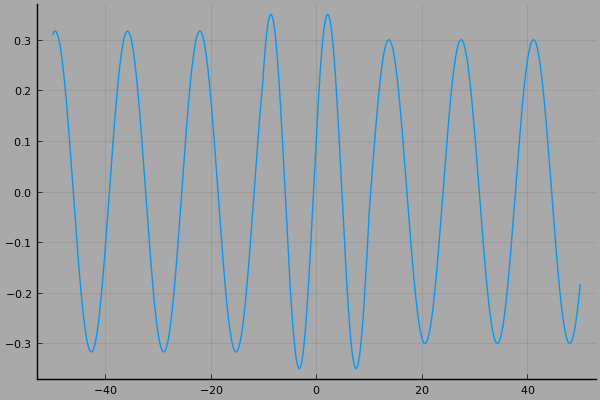

In [84]:
@time let 
    an = real(ψd(0.1,0.3; kw...))
    plot(z, [an[i][1] for i in 1:length(z)], background_color="darkgrey", legend=false)
end

We now choose a suitable constant arbitrarily, (C ≠ 0) in order to find the remaining constants uniquely

In [85]:
let 
    an(Cd) = ψd(0.2, Cd; V0=V0, a=a, s=s, kw...)
    Ψ = an(0.1)
    @time [real(sum(conj.(Ψ[i]) .* Ψ[i])) for i in 1:1001]
end;

  0.047649 seconds (74.26 k allocations: 3.625 MiB)


In [86]:
function Const(C=0.2; Cd=-0, V0=V0, E=E, m0=m0, state::String="sup", rel="y", a=a, s=s, kwargs...)
    
    l = length(kwargs[:zi]:kwargs[:step]:kwargs[:zf])
    an(Cd) = ψd(C, Cd; V0=V0, E=E, m0=m0, state=state, rel=rel, a=a, s=s, kwargs...)
    
    function Ψ(Cd) 
        Ψ = an(Cd)
        return sum.((Ψ.*kwargs[:step])[i+1] for i in 1:l-1) .- 1
    end
    
    if Cd == -0
        return find_zero(Ψ, (-100im,100), Order1())
    else
        return Ψ(Cd)
    end
end

Const (generic function with 2 methods)

In [87]:
@time Cd = Const(1;kw...)

  0.574366 seconds (4.20 M allocations: 486.139 MiB, 16.09% gc time)


11.025477444181647 - 2.801530569789424im

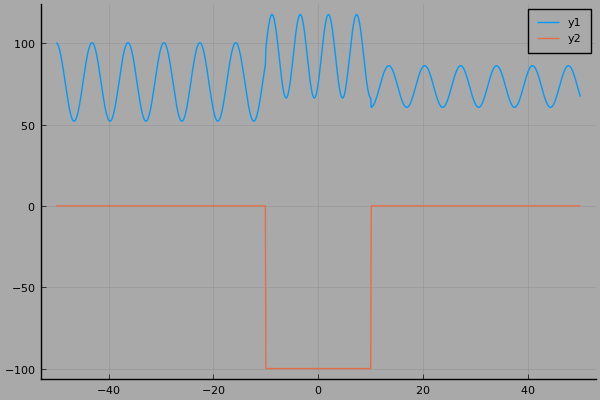

In [88]:
let LL = ψd(1, Cd; V0=V0, E=E, m0=m0, state="suap", rel="y", a=a, s=s, kw...)
    L = Float64[]
    for (i,j) in enumerate(kw[:zi]:kw[:step]:kw[:zf])
        push!(L, real(sum(conj(LL[i]) .* LL[i])))
    end
    plot(z, L, background_color="darkgrey")
    plot!(z, potential(V0; a=a, kw...))
end